<a href="https://colab.research.google.com/github/mostafa-ja/mal_adv4/blob/main/KDE0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

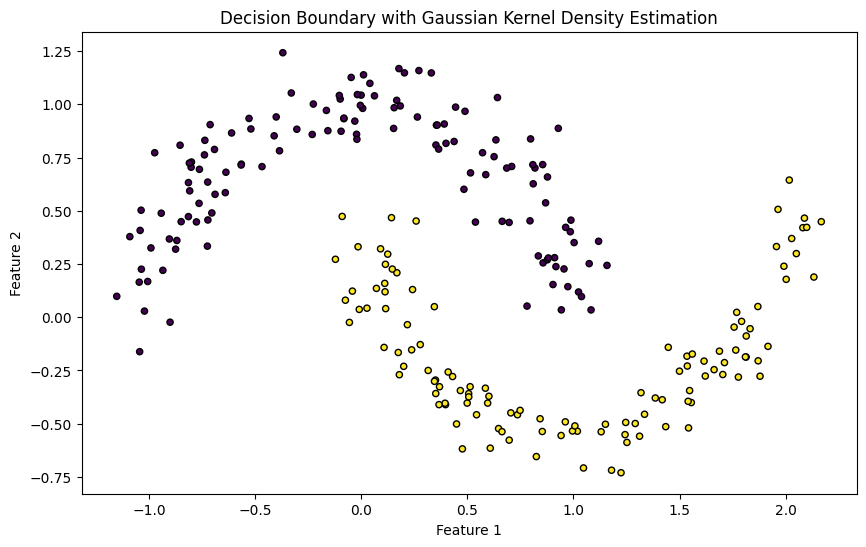

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate the dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
plt.title("Decision Boundary with Gaussian Kernel Density Estimation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [65]:
def KDE(x, centers, bandwidth,kernel):

    n_samples, n_features = X.shape
    n_train_samples = centers.shape[0]
    u = np.abs(x[:, None, :] - centers)

    if kernel == 'gaussian':
        scores = (np.exp(-0.5 * np.sum(u**2, axis=-1) / bandwidth**2)).mean(axis=1)
        normalization_constant = (2 * np.pi * bandwidth**2) ** (n_features / 2)
    else :
        scores = (np.exp(-np.sum(u, axis=-1) / bandwidth)).mean(axis=1)
        normalization_constant = (2 * bandwidth) ** n_features



    return scores / normalization_constant

Accuracy: 1.00


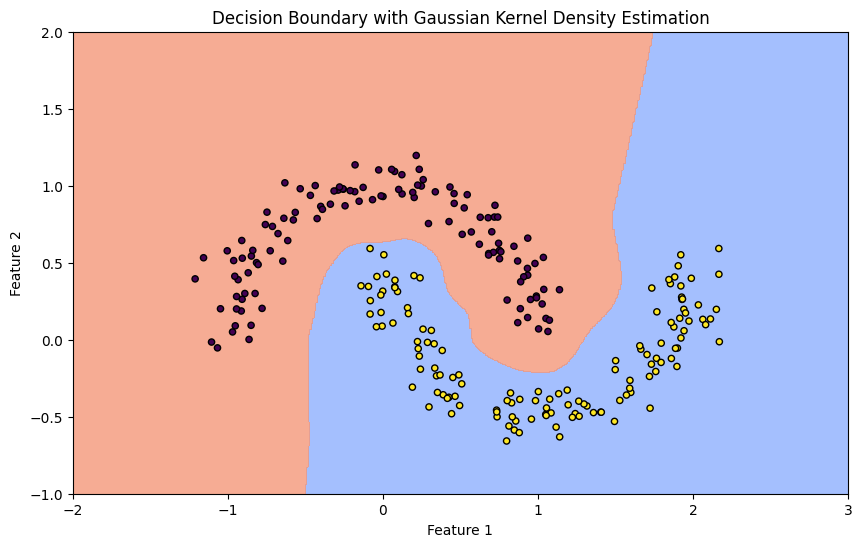

In [66]:
bandwidth = 0.1
kernel = 'gaussian'

# Compute density scores for the test set
dens_benign = KDE(X_test, X_train[y_train == 0], bandwidth,kernel)
dens_malware = KDE(X_test, X_train[y_train == 1], bandwidth,kernel)

# Step 3: Classify samples based on KDE
y_pred = np.where(dens_benign > dens_malware, 0, 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the dataset and decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

dens_benign_grid = kde_benign.score_samples(grid)
dens_malware_grid = kde_malware.score_samples(grid)

decision = dens_benign_grid > dens_malware_grid
decision = decision.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, decision, cmap='coolwarm', alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20)
plt.title("Decision Boundary with Gaussian Kernel Density Estimation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [67]:
bens = X_test[y_test==0]
mals = X_test[y_test==1]
print(KDE(bens[:10], X_train[y_train == 0], bandwidth,kernel))
print(KDE(mals[:10], X_train[y_train == 0], bandwidth,kernel))

[0.39886128 0.83882155 0.1903426  0.722536   0.95418685 0.60313501
 0.7517505  1.23604367 0.48428539 0.56912891]
[2.06988290e-06 5.43713339e-06 2.45436997e-06 5.09419977e-08
 1.24492756e-07 3.91559736e-08 8.14033812e-13 3.02309926e-09
 3.42176698e-05 1.61756589e-11]


In [68]:
print(KDE(bens[:10], X_train[y_train == 1], bandwidth,kernel))
print(KDE(mals[:10], X_train[y_train == 1], bandwidth,kernel))

[2.73366221e-11 3.25545424e-16 8.97287255e-14 1.79957013e-14
 2.05821868e-09 1.52731345e-06 1.04377462e-07 3.82631089e-06
 2.16472710e-15 4.50068740e-05]
[0.53453268 0.95170179 0.95223539 0.8667929  1.61702554 0.60624112
 1.28369681 0.89910769 0.80400404 1.27740132]


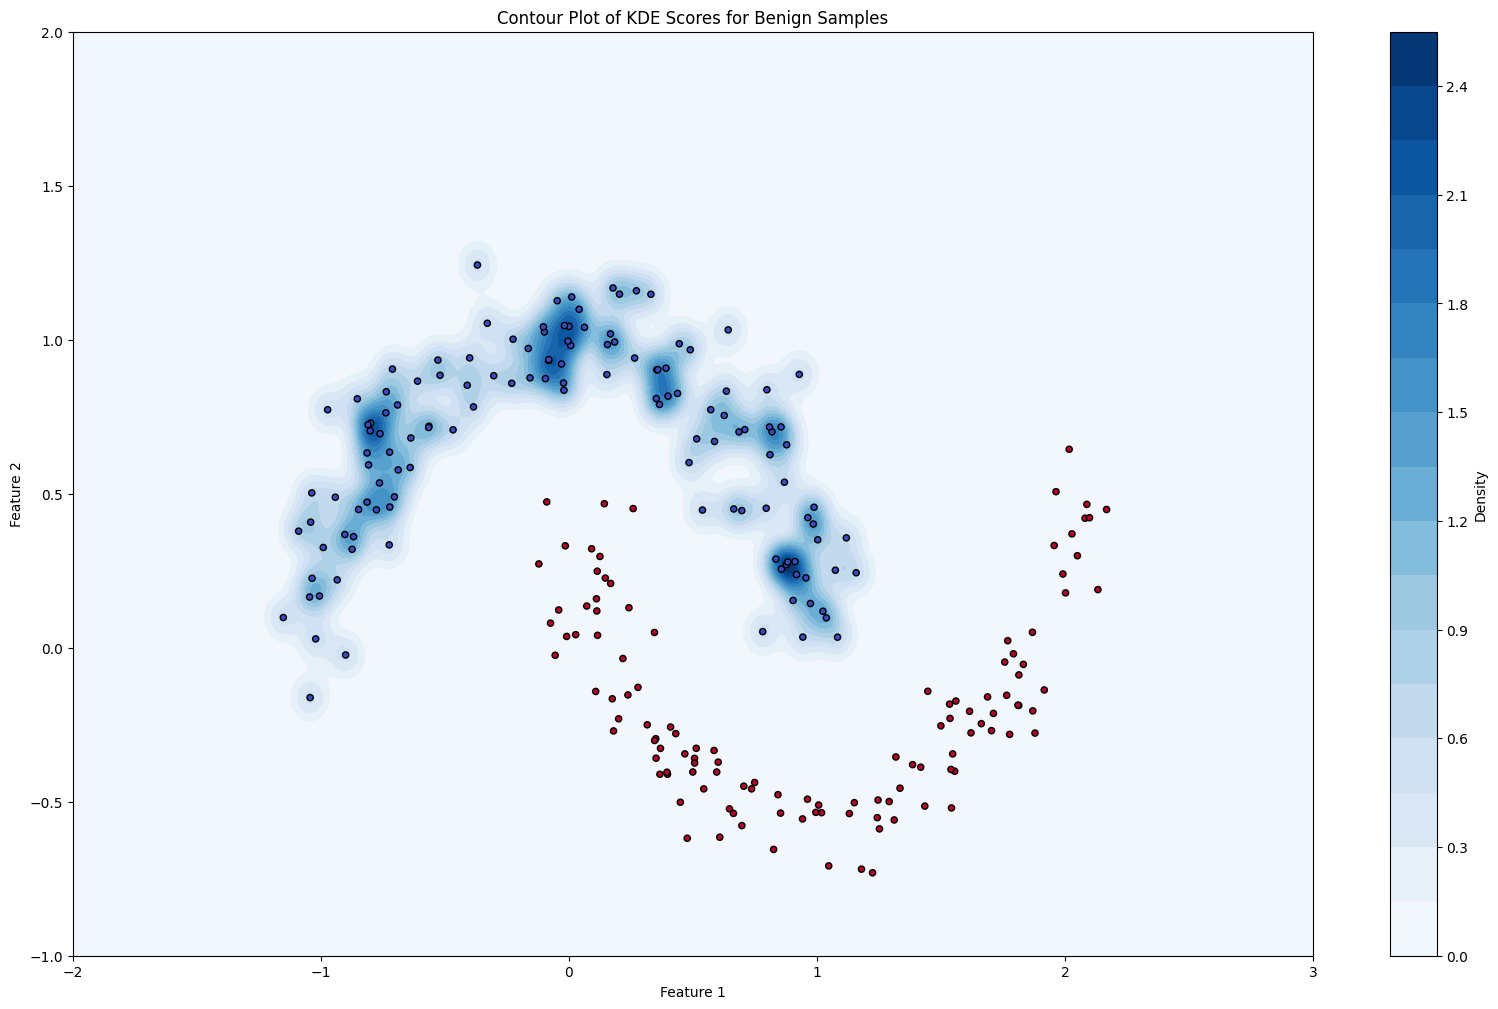

In [69]:
# Fit KDE model for benign class
bandwidth = 0.05
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

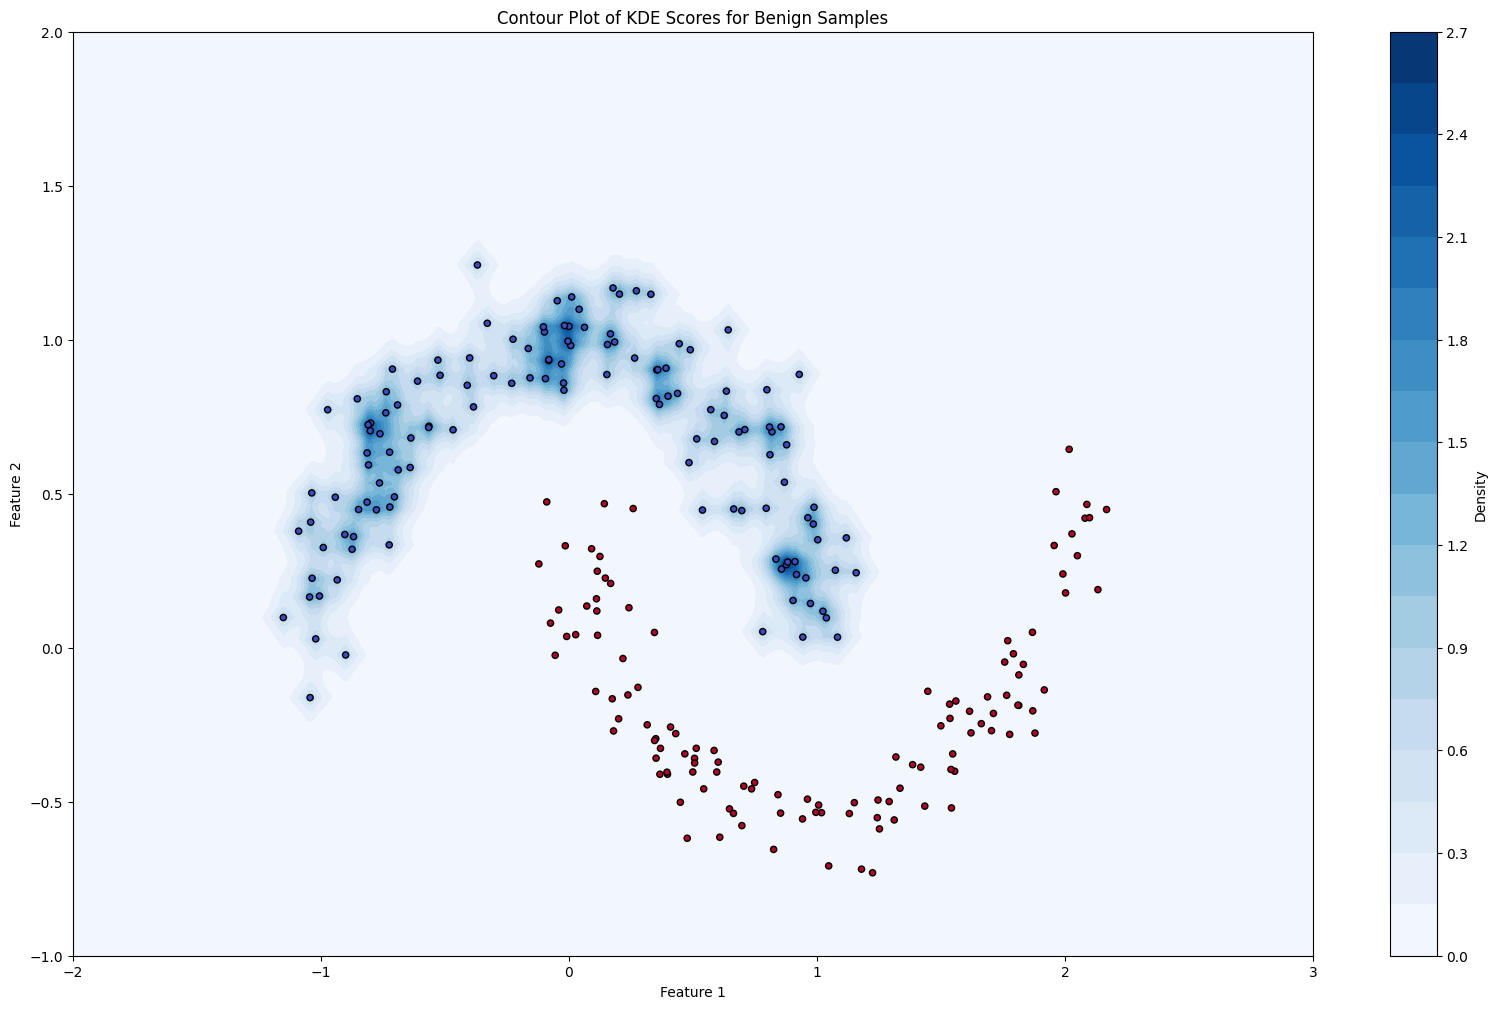

In [70]:
# Fit KDE model for benign class
bandwidth = 0.05
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

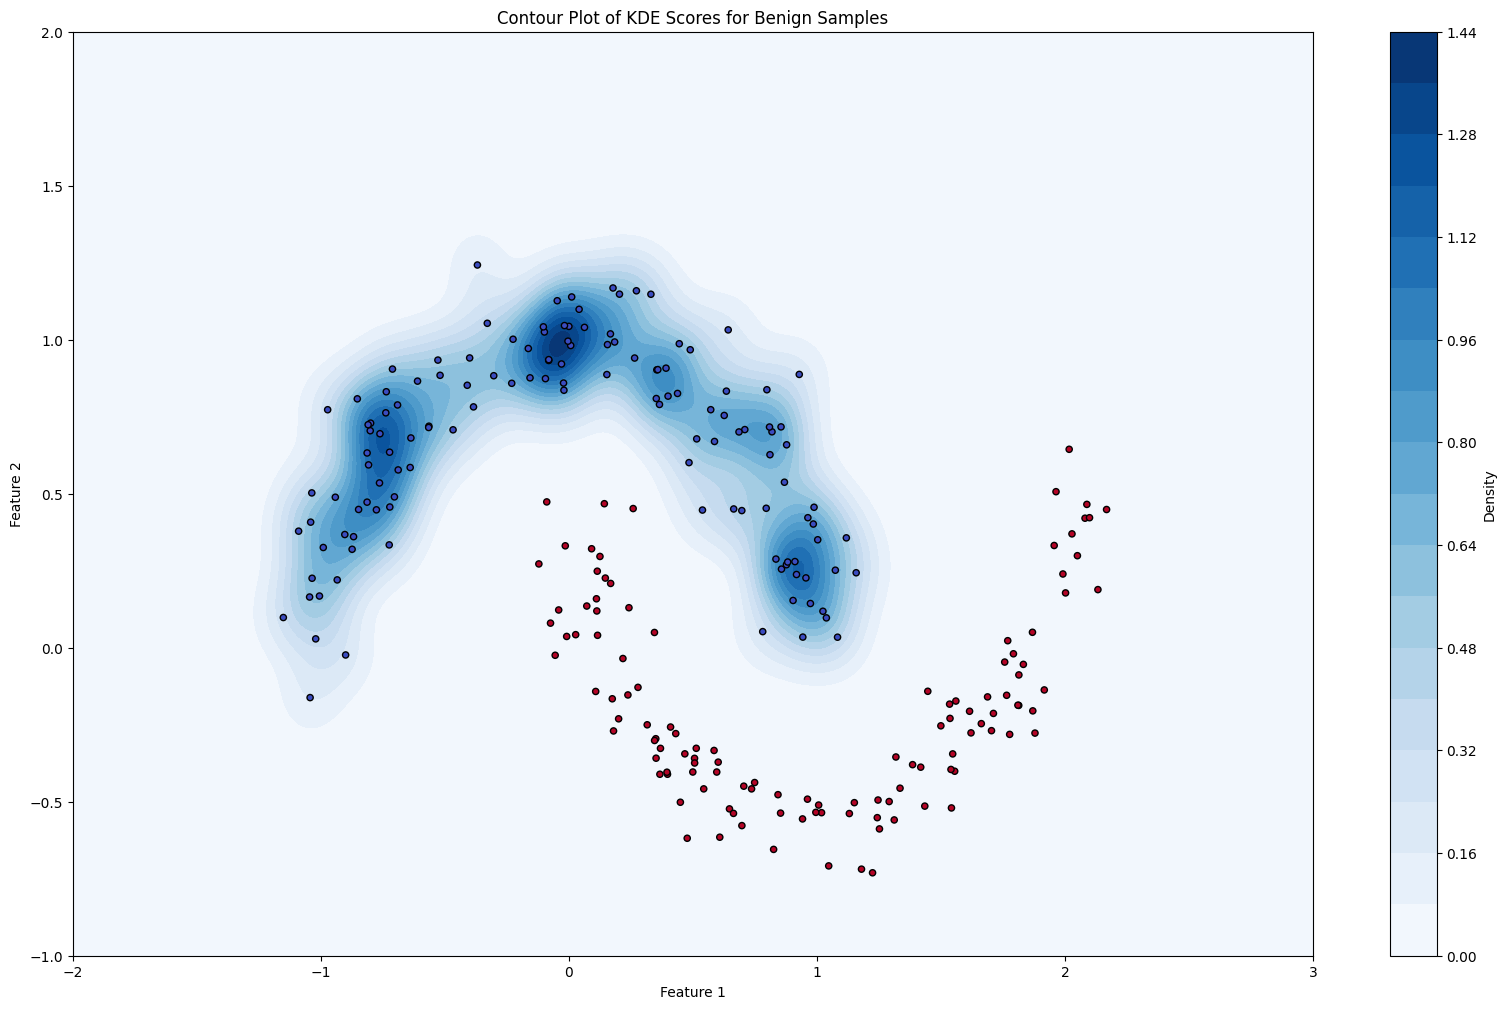

In [71]:
# Fit KDE model for benign class
bandwidth = 0.1
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

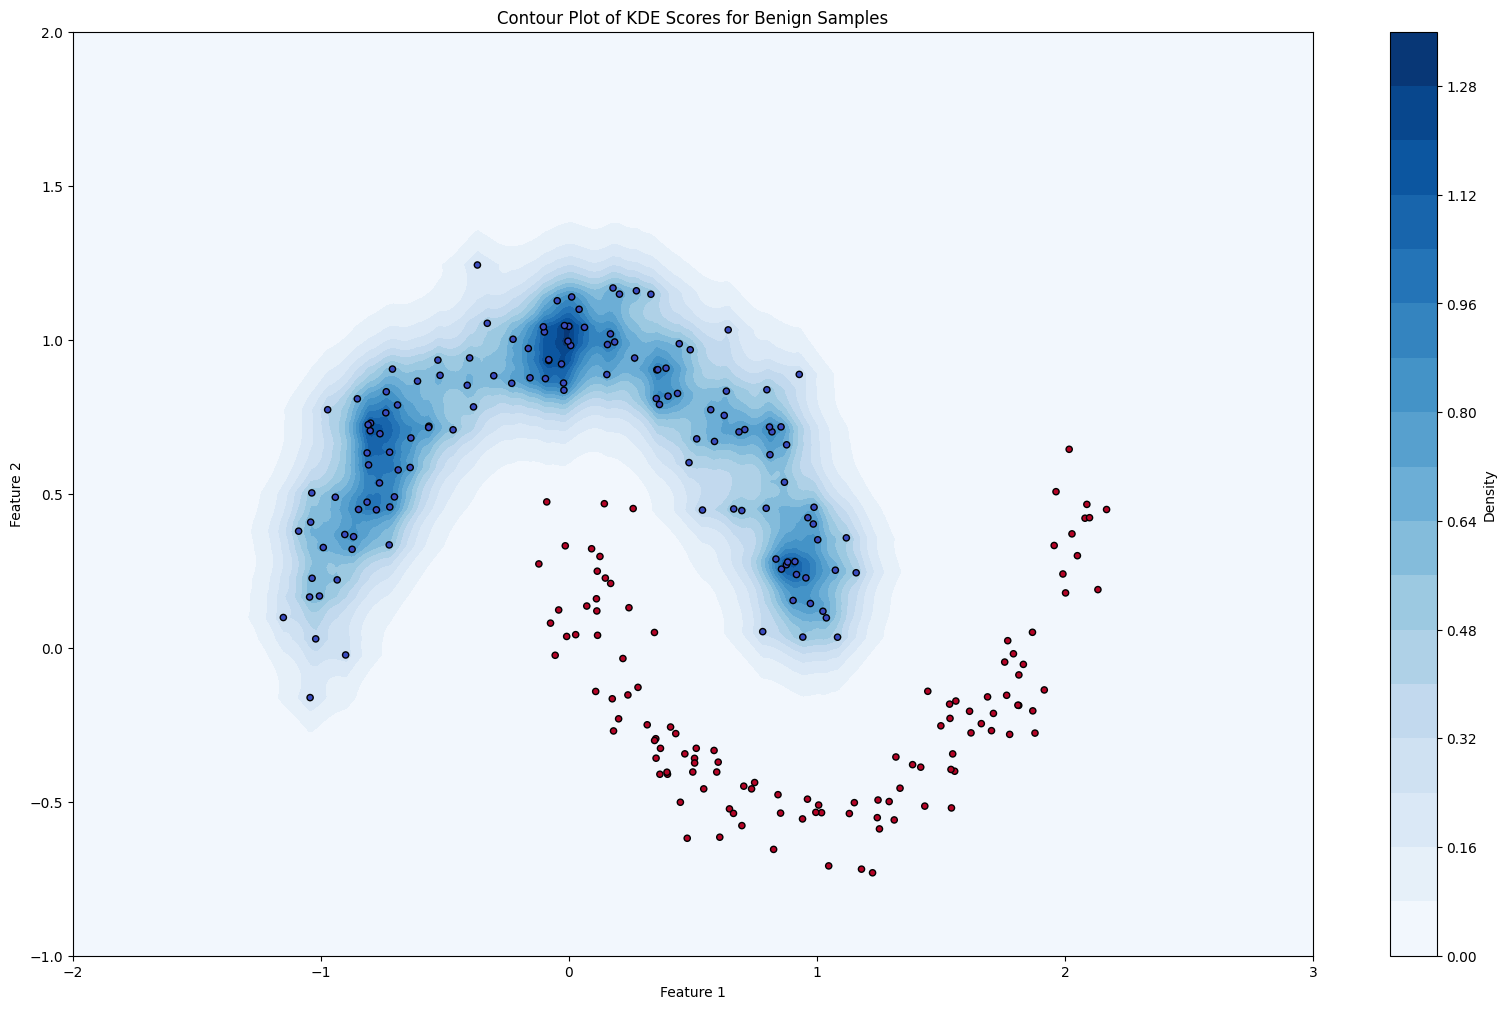

In [72]:
# Fit KDE model for benign class
bandwidth = 0.1
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

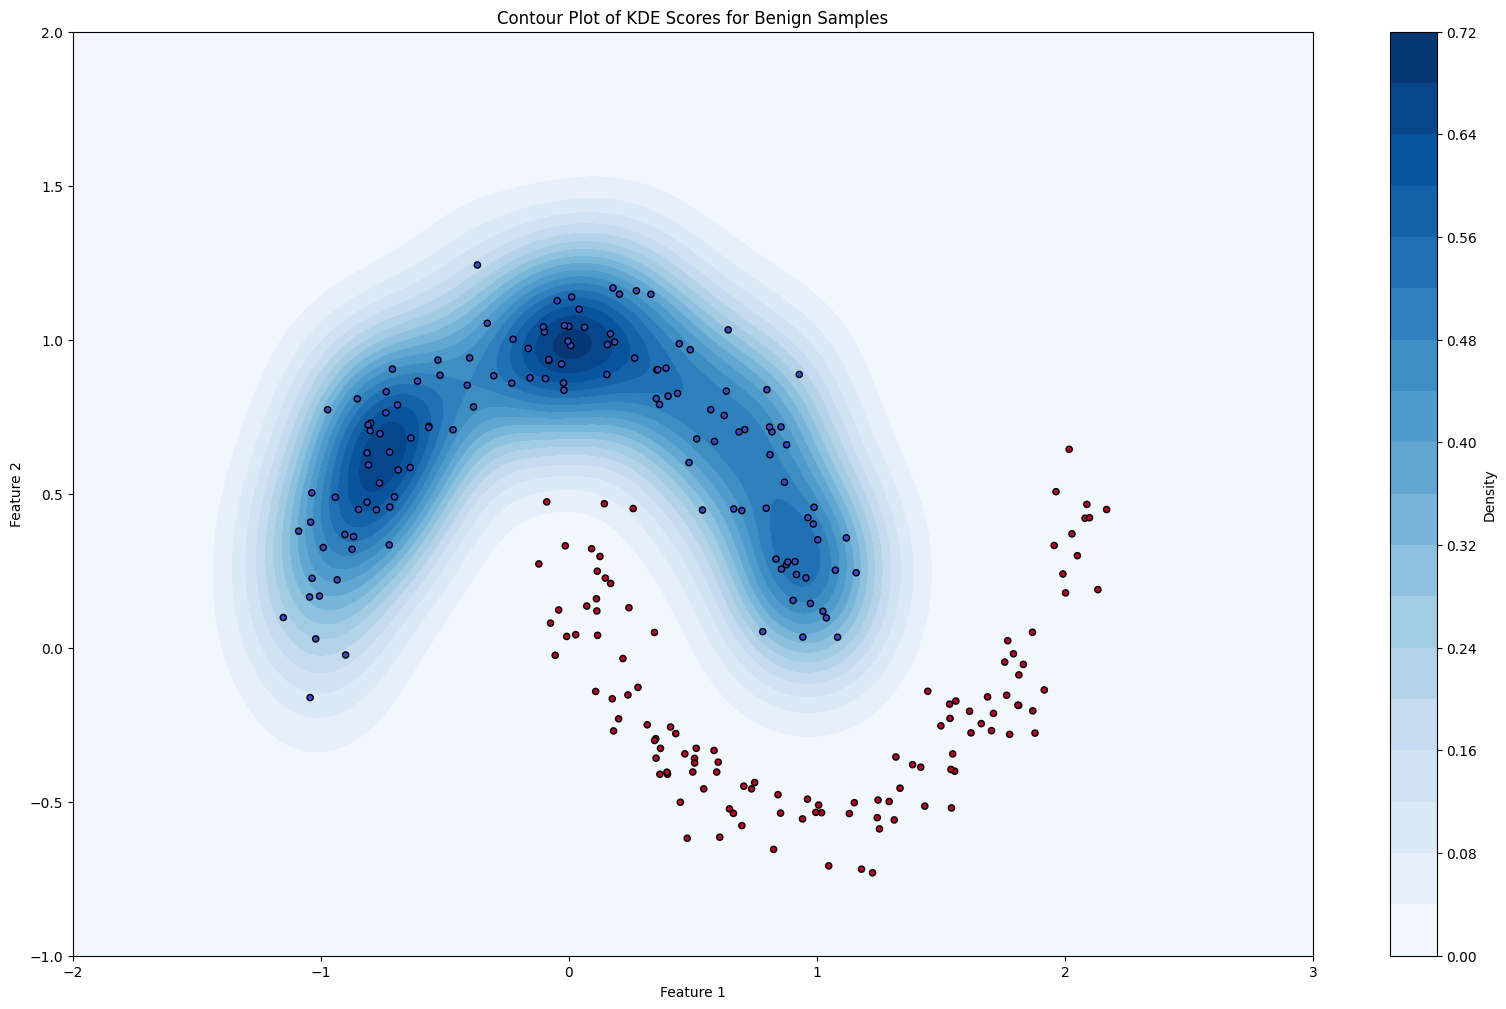

In [26]:
# Fit KDE model for benign class
bandwidth = 0.2
kde_benign = GaussianKDE(bandwidth)
kde_benign.fit(X_train[y_train == 0])

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = kde_benign.score_samples(grid)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

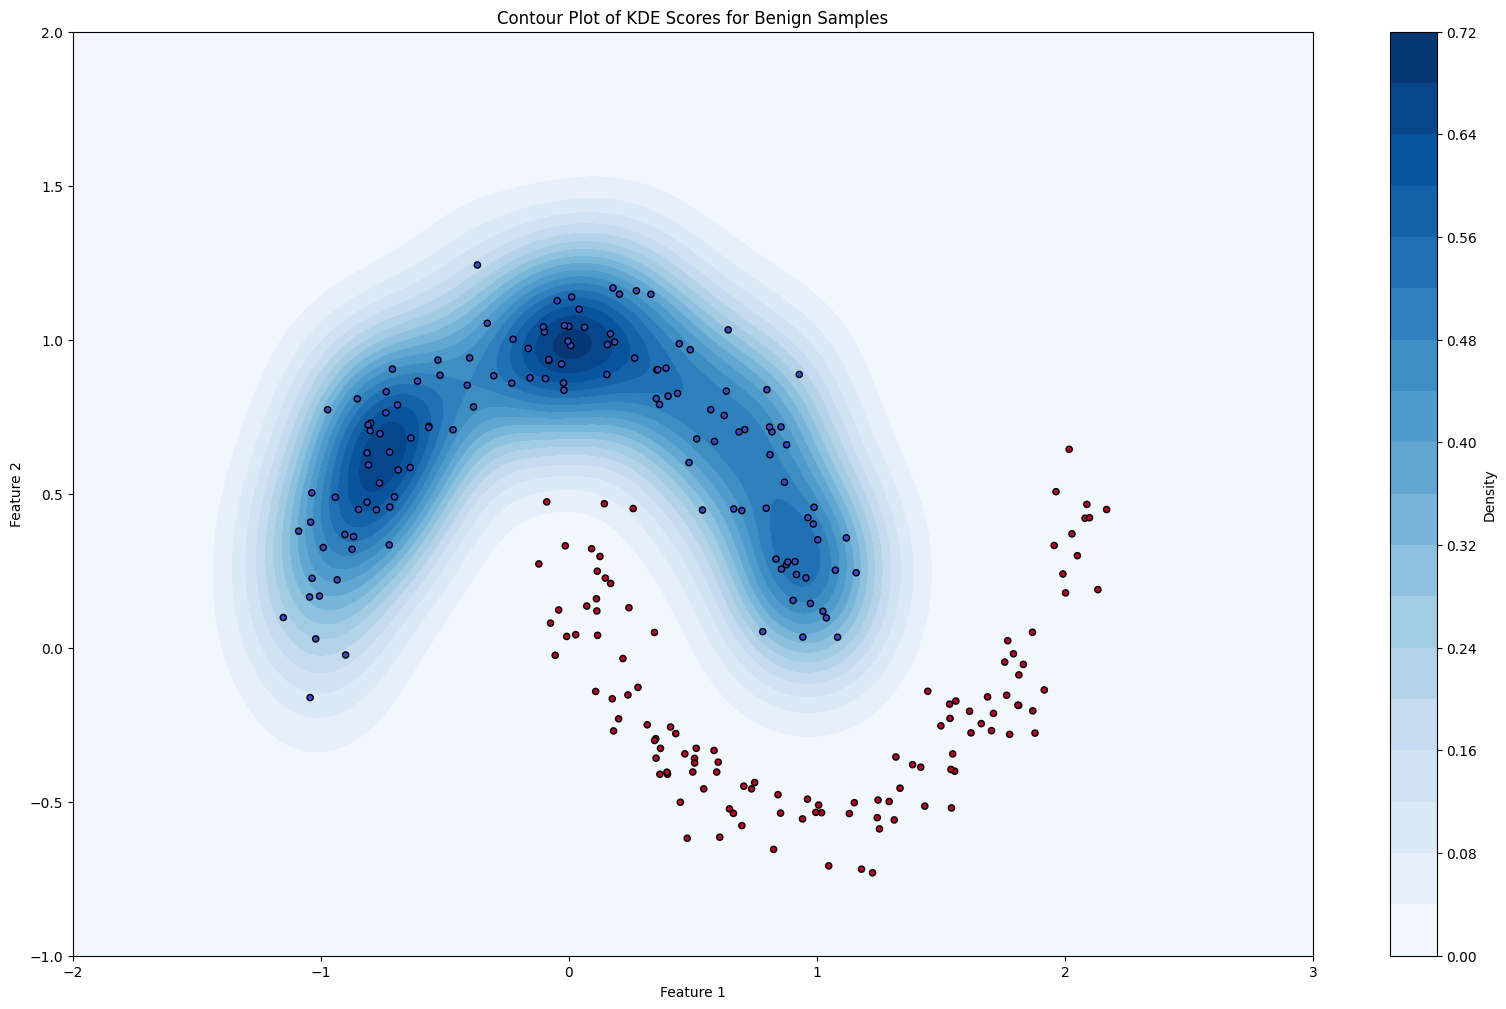

In [73]:
# Fit KDE model for benign class
bandwidth = 0.2
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

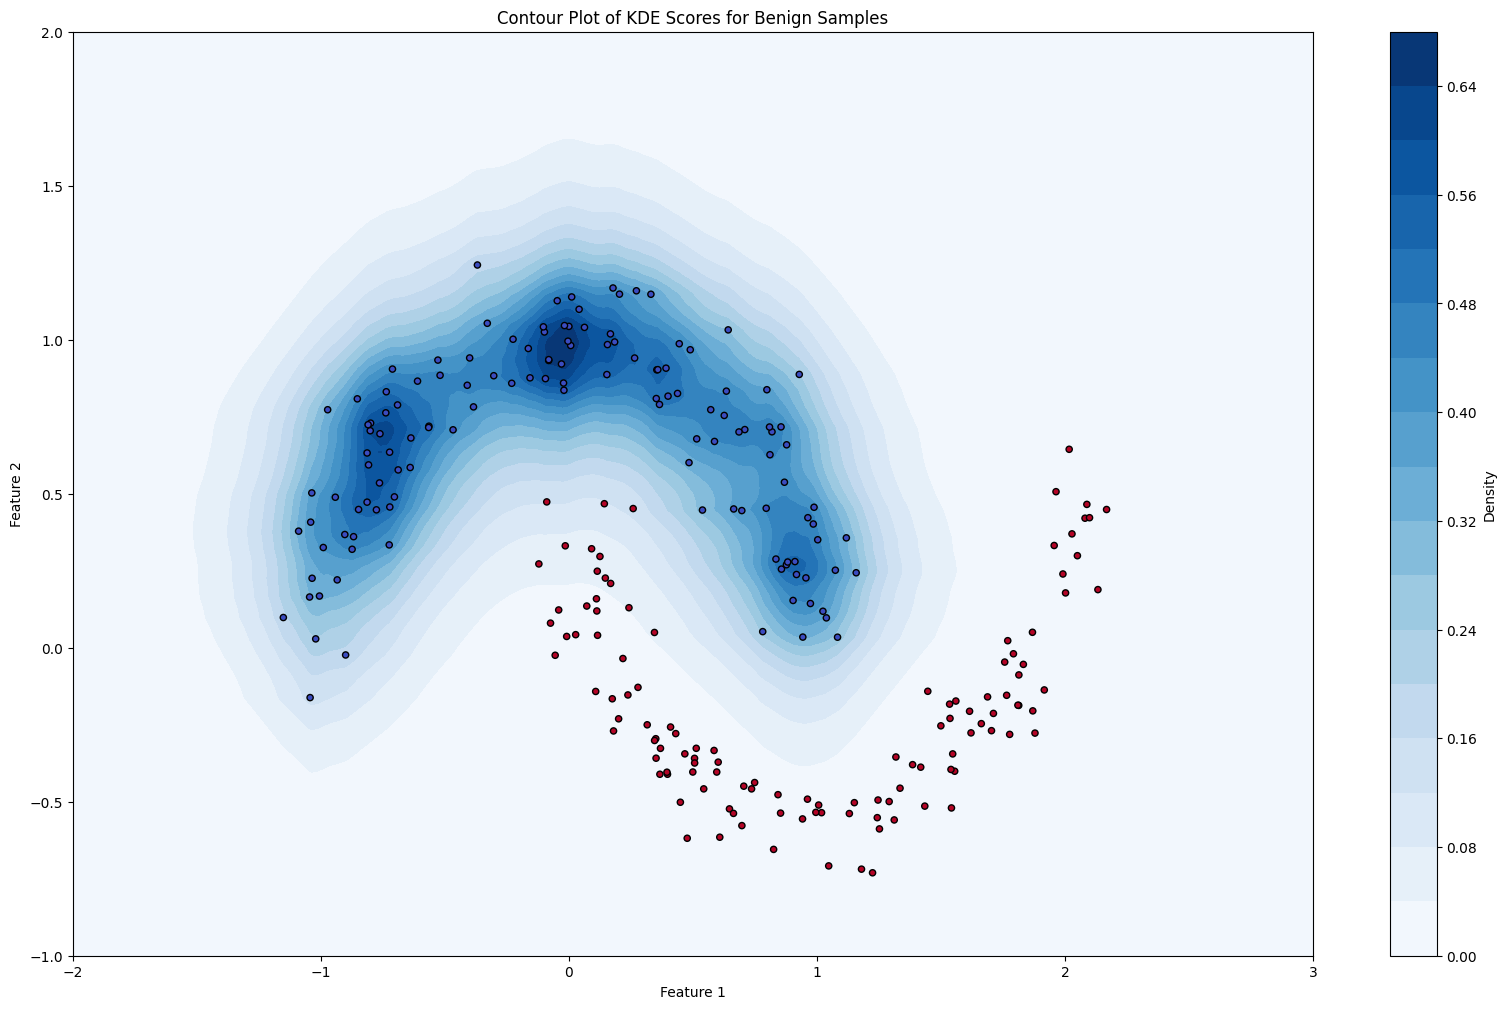

In [74]:
# Fit KDE model for benign class
bandwidth = 0.2
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

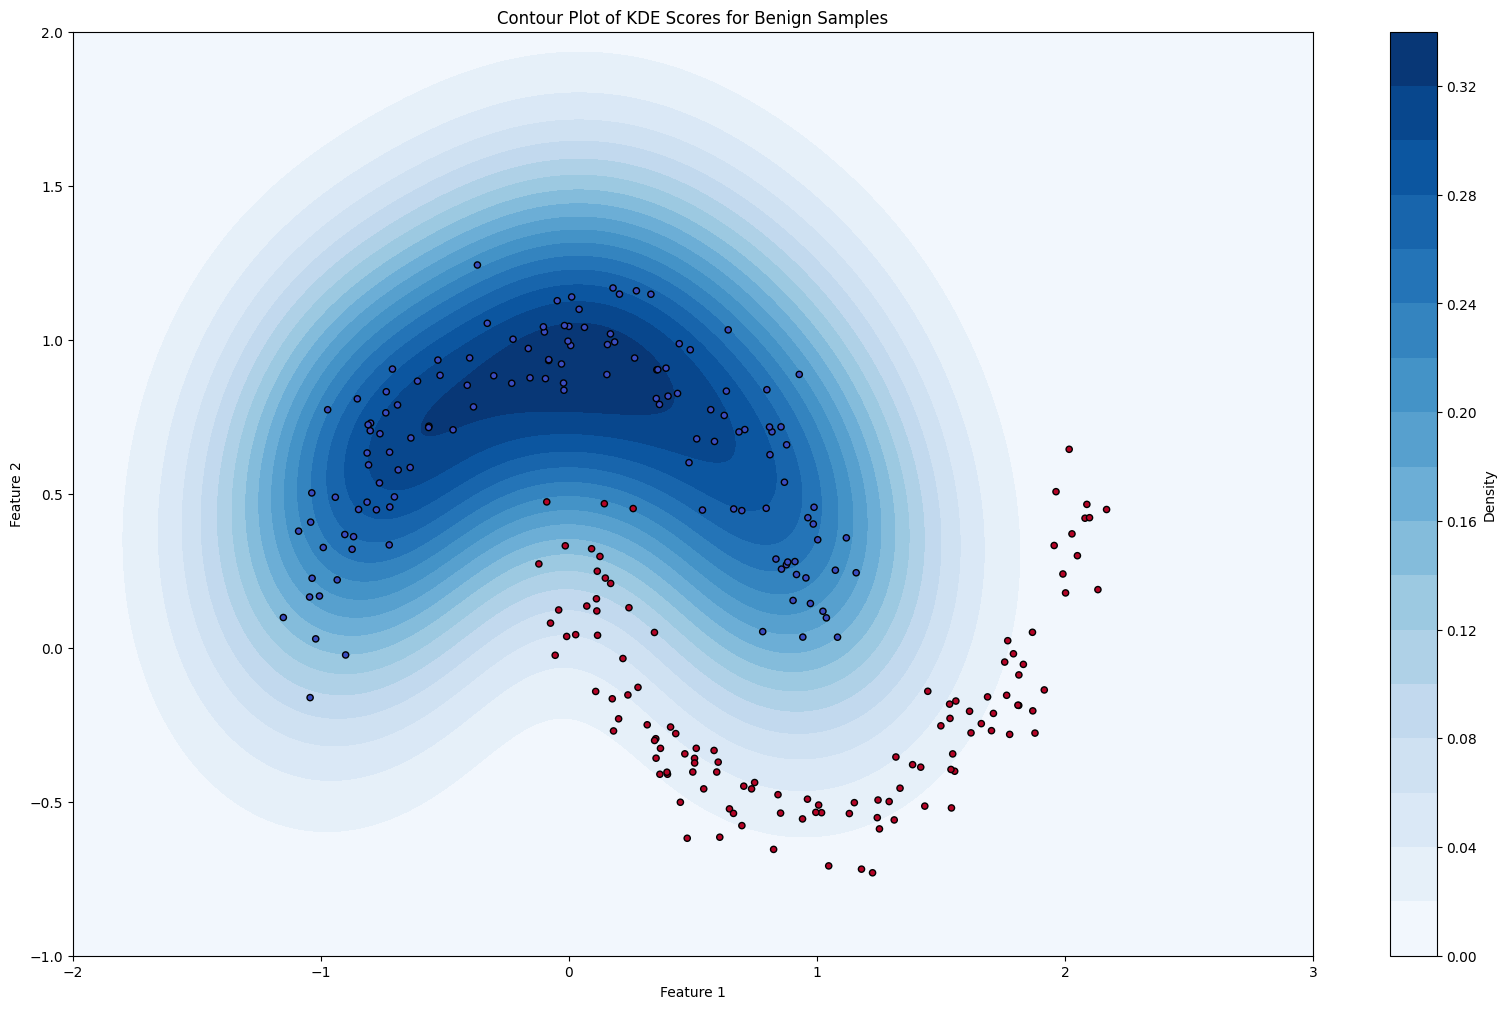

In [75]:
# Fit KDE model for benign class
bandwidth = 0.4
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

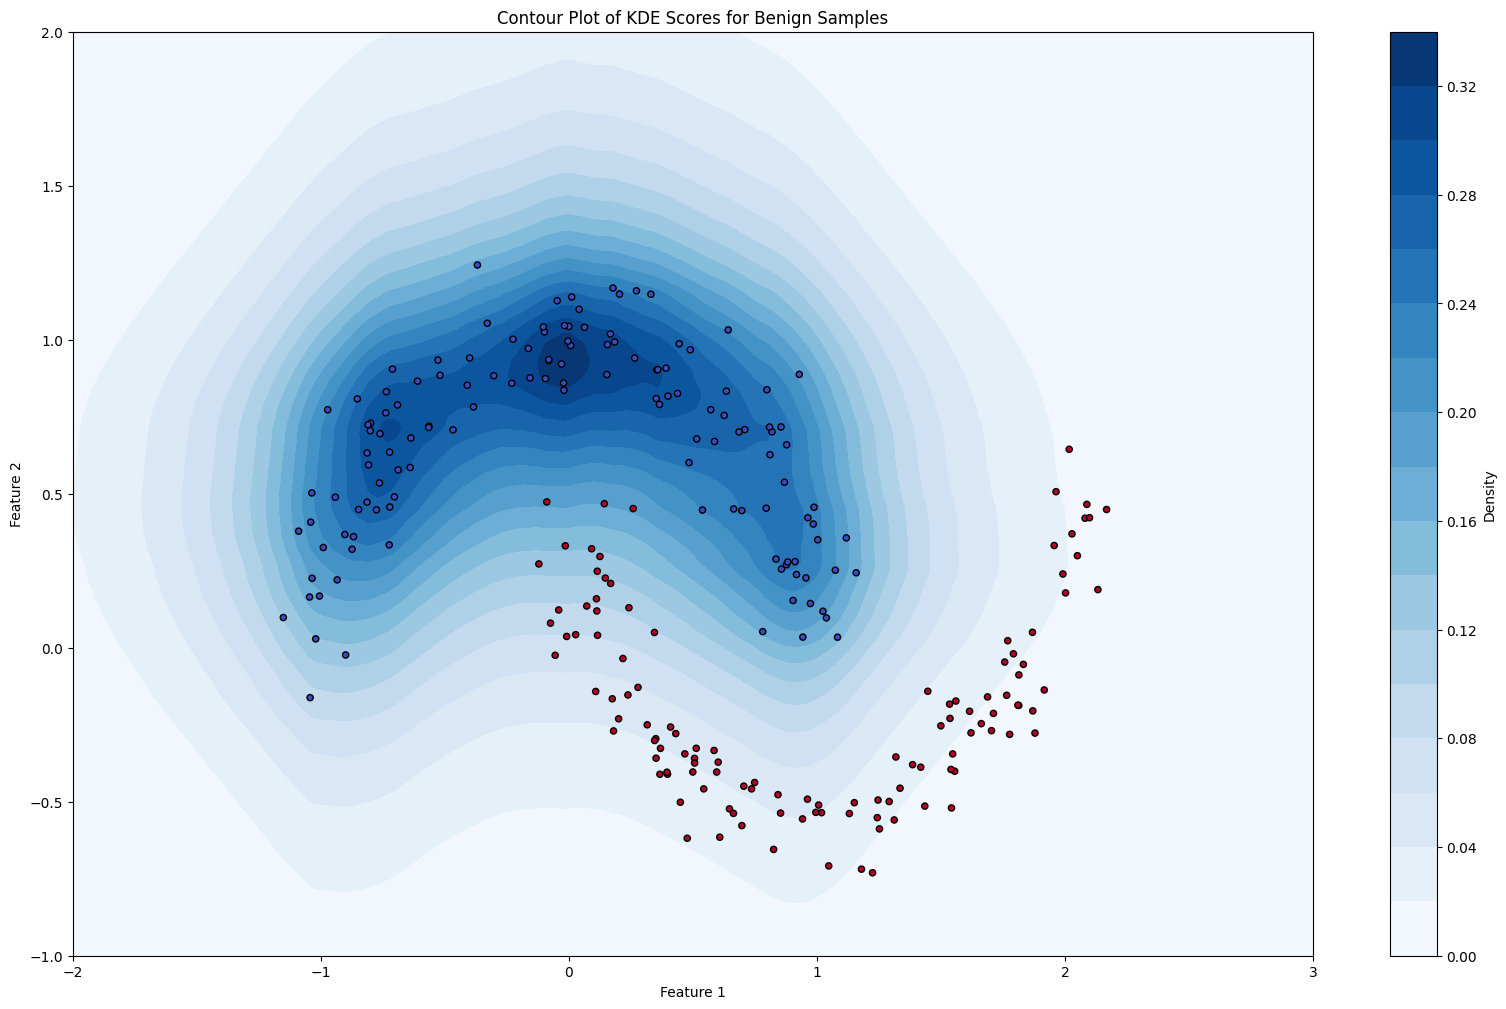

In [76]:
# Fit KDE model for benign class
bandwidth = 0.4
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:

def pgd_log(x, y, model,centers, bandwidth, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    model.eval()
    eps = 1e-10
    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')

    loss_natural = KDE(x, centers, bandwidth)

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    loss_steps_i = []
    loss_steps_d = []
    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        k = KDE(x_var, centers, bandwidth)
        loss = -torch.log(k + eps)
        #loss = -k
        loss_steps_i.append(loss.mean().detach().item())
        #loss_steps_d.append(loss.mean().detach().item())
        #loss_steps.append(loss.mean().detach().item())
        loss_steps_d.append(criterion(model(x_var), y.view(-1).long()).mean().detach().item())

        #print('loss ',loss.detach())
        #print('softmax',ce.detach())
        #print('KDE ',  kde.detach())
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        grad4insertion = (gradients >= 0) *(x_var < 1.)* insertion_array_updated * gradients
        grad4removal = (gradients < 0) * (x_var > 0.) * removal_array_updated * gradients

        gradients = grad4removal + grad4insertion
        #print(torch.abs(gradients).sum())

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'free':
            perturbation = gradients

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)



    diff = torch.abs(x_next - x).sum(dim=-1)

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")
        print('mean of differnce featres',torch.mean(diff))

    return x_next,loss_steps_d,loss_steps_i
